In [3]:
# MAGICS

%matplotlib widget
# To prevent automatic figure display when execution of the cell ends
%config InlineBackend.close_figures=False 

**Generate your own Grain Pattern!**

**Grid size:**  
Grid size of square
    
**Pattern:**  
- *example 1:* `6` will display one black square followed by five white squares 
- *example 2:* `4` will display one black square followed by three white squares 
- *example 3:* `34` will display one black square, two white squares, one black square, three white squares 

**Layered:**  
Single layer or two layers at right angles on top of one another

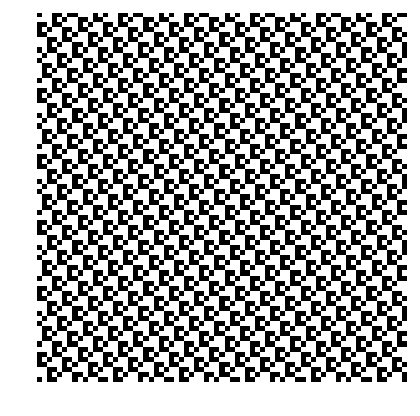

In [13]:
# WIDGETS

# import libraries
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display,clear_output

# Create the widgets 
## Grid size
size = widgets.BoundedIntText(
    value=73,
    min=1,
    max=100,
    step=1,
    description='Grid size',
    disabled=False,
)
## pattern
pattern = widgets.BoundedIntText(
    value=4252,
    min=0,
    max=9999999999999999999999999,
    step=1,
    description='Pattern',
    disabled=False
)
## layers
layered = widgets.RadioButtons(
    options=['single layer', 'double layer'],
    value='double layer',
    description='Layers:',
    disabled=False
)
## generate button
button = widgets.Button(description="Generate Grain Pattern")
## output widget
out1 = widgets.Output()

# create a box which contains the widgets
hbox = widgets.HBox(children=[size,pattern,layered])
vbox = widgets.VBox(children=[hbox, button, out1])

# display the box
display(vbox)

plt.ioff()
ax=plt.gca()

# when the generate button is clicked, generate the dotspace and re-plot
def on_button_clicked(b):
    generate_dotspace(size.value,pattern.value,layered.value)
    with out1:
        clear_output(wait=True)
        display(ax.figure)
        
button.on_click(on_button_clicked)

on_button_clicked(None)
        

# DOTSPACE BACKEND

## create the patterm
def create(args, orientation):

    pattern = np.zeros(args["width"]*args["height"], dtype=int)
    
    if orientation == 90:
        steps = 1
        basis = args["digital"]
    elif orientation == 0:
        steps = 0
        basis = args["digital"]

    basis_length = len(basis)
    
    # Working in 1D
    counter = 0 
    for position in np.arange(len(pattern)):
        if basis[counter] == 1:
            pattern[position] = 1
        counter = ((counter + 1) % basis_length) # clock maths!
    
    # 2D to the eye
    pattern.shape = (args["height"], args["width"])
    pattern = np.rot90(pattern,4-steps)    
    return pattern

## overlay the pattern rotated 90 degrees over itself
def overlay(pattern):

    length = pattern[0].shape[0] # We know they are square
    pattern_overlaid = np.zeros((length, length))
    
    for i in np.arange(length):
        for j in np.arange(length):
            if any(x[i,j] == 1 for x in pattern):
               pattern_overlaid[i,j] = 1
               
    return pattern_overlaid

## plot
def visualise(args, pattern):
    
    plt.set_cmap('Greys')
    ax.imshow(pattern, interpolation='nearest') 
    plt.axis('off')


def generate_dotspace(size,pattern,layered):
    
    ax.clear()

    # set input parameters
    args = dict()        
    args["dpi"] = 96
    args["basis"] = pattern
    args["digital"] = []
    digits_list = list(map(int,str(pattern)))
    for x in digits_list:
        args["digital"] = args["digital"] + [1] + [0]*(x-1)
    args["width"] = size
    args["height"] = size
    
    # create pattern
    patterns = []
    patterns.append(create(args,0))
    
    # if double layered, then layer patterns
    if layered == "double layer":
        patterns.append(create(args,90))
        patterns.append(overlay(patterns))

    # visualise the result
    pattern = patterns[-1]
    visualise(args, pattern)




Grain Pattern is a project led my artist [Richard Scott](https://richard-scott.info/home.html). 

The GrainGenerator web app was written by [Lucy Whalley](https://lucydot.github.io) and the code for this open source project can be found [here](https://github.com/lucydot/dotspace_heroku).